<a href="https://colab.research.google.com/github/MickPerl/MachineLearningProject/blob/main/ProjectAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1QPsU3xbgoY25jiMgoWamYhxKLT_iMHYA#scrollTo=XDspGgUS55Xo)

# Installazione delle librerie necessarie per l'analisi dei dati

In [ ]:
!pip install scikit-learn==0.24.2 cluster-over-sampling

     |████████████████████████████████| 22.3MB 2.1MB/s 
     |████████████████████████████████| 215kB 27.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


# Import delle librerire fondamentali per l'analisi dei dati

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from sklearn.model_selection import train_test_split

# Ottenimento dataset
La variabile `DATASET_PATH` sarà settata con il valore corretto.

**Settare a** `True` **la variabile** `from_gdrive` **per accedere al dataset tramite Google Drive. Settarla a** `False`
**per accedere al dataset in locale.**

In [ ]:
from_gdrive = True
if from_gdrive:
    from google.colab import drive
    drive.mount("/content/gdrive")
    %cd gdrive/MyDrive/ProjectAI/
    DATASET_PATH = "Data/invalsi_mat_2014.csv"
else:
    DATASET_PATH = "../invalsi_mat_2014.csv"

Mounted at /content/gdrive
/content/gdrive/MyDrive/ProjectAI


In [ ]:
in_jupyter_notebook = False
if in_jupyter_notebook:
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

## Utility per tipi e conversioni

In [ ]:
from typing import List, Dict, Tuple
string_list = List[str]
one_hot_list = Tuple[int]
one_hot_encoding_list = Dict[str, one_hot_list]
one_hot_encoding_int = Dict[str, int]

## Mappe e funzioni per conversioni valori del dataset in valori numerici o booleani

In [ ]:
def from_categorical_to_one_hot_int(categorical_data: string_list) -> one_hot_encoding_int:
    dictionary_to_return = {}
    for index, key in enumerate(categorical_data):
        dictionary_to_return[key] = index
    
    return dictionary_to_return

def from_categorical_to_one_hot_list(categorical_data: string_list) -> one_hot_encoding_list:
    dictionary_to_return = {}
    indexes = range(len(categorical_data))
    for index, key in enumerate(categorical_data):
        dictionary_to_return[key] = [1 if index == i else 0 for i in indexes]
    
    return dictionary_to_return

#Features categorica -> One Hot Encoding
list_MESI = ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Settembre", "Ottobre", "Novembre", "Dicembre", "Non disponibile"]
MESI = from_categorical_to_one_hot_int(list_MESI)

#Features categorica -> One Hot Encoding
list_ANNI = ["2000", "2001", "1999", "1998", "<=1997", ">=2002", "Non disponibile"]
ANNI = from_categorical_to_one_hot_int(list_ANNI)

#Features categorica -> One Hot Encoding
list_ETA = ['Mancante di sistema', 'Non disponibile', '6 anni', '5 anni', '10 anni o più', '2 anni', '1 anno o prima', '9 anni', '8 anni', '4 anni', '7 anni', '3 anni']
ETA = from_categorical_to_one_hot_int(list_ETA)

def convert_question_result(result: str):
    return result == "Corretta" # alternativamente result == "Errata"

#Features categorica -> One Hot Encoding
list_REGOLARITA = ['Regolare', 'Posticipatario', 'Anticipatario', 'Dato mancante']
REGOLARITA = from_categorical_to_one_hot_int(list_REGOLARITA)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_5_ISTAT = ['Sud', 'Nord est', 'Centro', 'Nord ovest', 'Isole']
AREA_GEOGRAFICA_5_ISTAT = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_5_ISTAT)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_5 = ['Sud', 'Nord est', 'Centro', 'Nord ovest', 'Sud e isole']
AREA_GEOGRAFICA_5 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_5)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_4 = ['Mezzogiorno', 'Nord est', 'Centro', 'Nord ovest']
AREA_GEOGRAFICA_4 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_4)

#Features categorica -> One Hot Encoding
list_AREA_GEOGRAFICA_3 = ['Mezzogiorno', 'Nord', 'Centro']
AREA_GEOGRAFICA_3 = from_categorical_to_one_hot_int(list_AREA_GEOGRAFICA_3)

#Features categorica -> One Hot Encoding
list_REGIONI = ['Campania', 'Emilia-Romagna', 'Lazio', 'Piemonte', 'Puglia', 'Lombardia', 'Veneto', 'Sicilia', 'Prov. Aut. Trento', 'Friuli-Venezia Giulia', 'Abruzzo', 'Liguria', 'Toscana', 'Sardegna', 'Calabria', 'Molise', 'Marche', 'Umbria', 'Basilicata', 'Prov. Aut. Bolzano (l. it.)']
REGIONI = from_categorical_to_one_hot_int(list_REGIONI)

#Features categorica -> One Hot Encoding
list_PROVINCE = ['', 'RE', 'FR', 'TO', 'BA', 'CO', 'LE', 'RO', 'CT', 'RM', 'TA', 'BS', 'SA', 'TN', 'UD', 'FG', 'LT', 'AG', 'CH', 'PC', 'TS', 'SR', 'SP', 'PD', 'SI', 'PA', 'TP', 'BO', 'CA', 'CN', 'RC', 'TE', 'MI', 'LC', 'LU', 'FI', 'AQ', 'TV', 'RG', 'VA', 'GO', 'MO', 'GE', 'AL', 'CB', 'PR', 'OR', 'VE', 'MC', 'NO', 'PT', 'MN', 'VR', 'PI', 'AP', 'LO', 'VI', 'SV', 'PU', 'BG', 'AR', 'VT', 'LI', 'SS', 'BR', 'RA', 'TR', 'SO', 'IM', 'PZ', 'GR', 'AN', 'PN', 'ME', 'CR', 'FE', 'BI', 'PV', 'PG', 'VB', 'BL', 'PE', 'CS', 'CZ', 'AV', 'RN', 'CL', 'AT', 'MS', 'KR', 'RI', 'EN', 'CE', 'MT', 'VV', 'VC', 'NU', 'FC', 'PO', 'BZ', 'BN', 'IS', 
            'NA', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'PS', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'FO', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
            'LB', # presente in cod_provincia_ISTAT ma non in sigla_provincia_istat
]
PROVINCE = from_categorical_to_one_hot_int(list_PROVINCE)

#Features categorica -> One Hot Encoding
list_CITTADINANZA = ['Italiano', 'Straniero II generazione', 'Straniero I generazione', 'Dato mancante']
CITTADINANZA = from_categorical_to_one_hot_int(list_CITTADINANZA)

list_VOTI_NUMERICI = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
def voto_orale_decode(voto_orale: str):
    if voto_orale in list_VOTI_NUMERICI:
        return int(voto_orale)
    elif voto_orale == 'Non disponibile':
        return np.nan
    elif voto_orale == 'Non classificato': 
        return 0

list_VOTI_NAN = ['Non disponibile', 'Senza voto scritto']
def voto_scritto_decode(voto_scritto: str):
    if voto_scritto in list_VOTI_NUMERICI:
        return int(voto_scritto)
    elif voto_scritto in list_VOTI_NAN:
        return np.nan
    elif voto_scritto == 'Non classificato': 
        return 0

def sesso_to_num(sesso: str):
    return sesso == "Maschio"

#Features categorica -> One Hot Encoding
list_PROFESSIONI = ['1. Disoccupato/a', '2. Casalingo/a', '3. Dirigente, docente universitario, funzionario o ufficiale militare', '4. Imprenditore/proprietario agricolo', '5. Professionista dipendente, sottuff. militare o libero profession. (medico, av', '6. Lavoratore in proprio (commerciante, coltivatore diretto, artigiano, meccanic', '7. Insegnante, impiegato, militare graduato', '8. Operaio, addetto ai servizi/socio di cooperativa', '9. Pensionato/a', '10. Non disponibile']
PROFESSIONI = from_categorical_to_one_hot_int(list_PROFESSIONI)

#Features categorica -> One Hot Encoding
list_TITOLI = ['1. Licenza elementare', '2. Licenza media', '3. Qualifica professionale triennale', '4. Diploma di maturità', '5. Altro titolo di studio superiore al diploma (I.S.E.F., Accademia di Belle Art', '6. Laurea o titolo superiore (ad esempio Dottorato di Ricerca)', '7. Non disponibile']
TITOLI = from_categorical_to_one_hot_int(list_TITOLI)

#Features categorica -> One Hot Encoding
list_LUOGHI_GENITORI = ['Italia (o Repubblica di San Marino)', 'Unione Europea', 'Paese europeo Non UE', 'Altro', 'Non disponibile']
LUOGHI_GENITORI = from_categorical_to_one_hot_int(list_LUOGHI_GENITORI)

#Features categorica -> One Hot Encoding
list_FREQUENZA_SCUOLA = ['No', 'Sì', 'Non disponibile']
FREQUENZA_SCUOLA = from_categorical_to_one_hot_int(list_FREQUENZA_SCUOLA)

#Features categorica -> One Hot Encoding
list_LUOGO_DI_NASCITA = ['Italia (o Repubblica di San Marino)', 'Unione Europea', 'Paese europeo Non UE', 'Altro', 'Non disponibile']
LUOGO_DI_NASCITA = from_categorical_to_one_hot_int(list_LUOGO_DI_NASCITA)

Definiamo le conversioni che si dovranno eseguire al momento dell'import.

In [ ]:
columns_converters = {
    "CODICE_SCUOLA": str, #identificativo della scuola (non considerato)
    "CODICE_PLESSO": str, #identificativo del plesso (non considerato)
    "CODICE_CLASSE": str, #identificato della classe (non considerato)
    "macrotipologia": str, #categoria di scuola (non considerato)
    "campione": int, #campione di riferimento (non considerato)
    "livello": int, # (non considerato)
    "prog": int,
    "CODICE_STUDENTE": str, #codice dello studente (non considerato)
    "sesso": lambda result: sesso_to_num(result), #sesso dello studente
    "mese": lambda month: MESI[month], #mese di nascita
    "anno": lambda year: ANNI[year], #anno di nascita
    "luogo": lambda luogo: LUOGO_DI_NASCITA[luogo],
    "eta": lambda eta: ETA[eta], # cosa vuol dire eta?
    "codice_orario": lambda _: np.nan, # unico dato: Mancante di sistema
    "freq_asilo_nido": lambda frequenza: FREQUENZA_SCUOLA[frequenza],
    "freq_scuola_materna": lambda frequenza: FREQUENZA_SCUOLA[frequenza],
    "luogo_padre": lambda luogo: LUOGHI_GENITORI[luogo],
    "titolo_padre": lambda titolo: TITOLI[titolo],
    "prof_padre": lambda professione: PROFESSIONI[professione],
    "luogo_madre": lambda luogo: LUOGHI_GENITORI[luogo],
    "titolo_madre": lambda titolo: TITOLI[titolo],
    "prof_madre": lambda professione: PROFESSIONI[professione],
    "voto_scritto_ita": lambda voto: voto_scritto_decode(voto),
    "voto_orale_ita": lambda voto: voto_orale_decode(voto),
    "voto_scritto_mat": lambda voto: voto_scritto_decode(voto),
    "voto_orale_mat": lambda voto: voto_orale_decode(voto),
    "D1": lambda result: convert_question_result(result),
    "D2": lambda result: convert_question_result(result),
    "D3_a": lambda result: convert_question_result(result),
    "D3_b": lambda result: convert_question_result(result),
    "D4_a": lambda result: convert_question_result(result),
    "D4_b": lambda result: convert_question_result(result),
    "D4_c": lambda result: convert_question_result(result),
    "D4_d": lambda result: convert_question_result(result),
    "D5_a": lambda result: convert_question_result(result),
    "D5_b": lambda result: convert_question_result(result),
    "D6": lambda result: convert_question_result(result),
    "D7_a": lambda result: convert_question_result(result),
    "D7_b": lambda result: convert_question_result(result),
    "D8": lambda result: convert_question_result(result),
    "D9": lambda result: convert_question_result(result),
    "D10_a": lambda result: convert_question_result(result),
    "D10_b1": lambda result: convert_question_result(result),
    "D10_b2": lambda result: convert_question_result(result),
    "D10_b3": lambda result: convert_question_result(result),
    "D11_a": lambda result: convert_question_result(result),
    "D11_b": lambda result: convert_question_result(result),
    "D12_a": lambda result: convert_question_result(result),
    "D12_b": lambda result: convert_question_result(result),
    "D13_a": lambda result: convert_question_result(result),
    "D13_b": lambda result: convert_question_result(result),
    "D13_c": lambda result: convert_question_result(result),
    "D14": lambda result: convert_question_result(result),
    "D15": lambda result: convert_question_result(result),
    "D16_a": lambda result: convert_question_result(result),
    "D16_b": lambda result: convert_question_result(result),
    "D16_c": lambda result: convert_question_result(result),
    "D16_d": lambda result: convert_question_result(result),
    "D17_a": lambda result: convert_question_result(result),
    "D17_b": lambda result: convert_question_result(result),
    "D18": lambda result: convert_question_result(result),
    "D19_a": lambda result: convert_question_result(result),
    "D19_b": lambda result: convert_question_result(result),
    "D20": lambda result: convert_question_result(result),
    "D21": lambda result: convert_question_result(result),
    "D22": lambda result: convert_question_result(result),
    "D23_a": lambda result: convert_question_result(result),
    "D23_b": lambda result: convert_question_result(result),
    "D23_c": lambda result: convert_question_result(result),
    "D23_d": lambda result: convert_question_result(result),
    "D24_a": lambda result: convert_question_result(result),
    "D24_b": lambda result: convert_question_result(result),
    "D25": lambda result: convert_question_result(result),
    "D26_a": lambda result: convert_question_result(result),
    "D26_b": lambda result: convert_question_result(result),
    "D26_c": lambda result: convert_question_result(result),
    "D26_d": lambda result: convert_question_result(result),
    "regolarità": lambda regular: REGOLARITA[regular],
    "cittadinanza": lambda cittadinanza: CITTADINANZA[cittadinanza],
    "cod_provincia_ISTAT": lambda province_istat: PROVINCE[province_istat.upper()],
    "sigla_provincia_istat": lambda province: PROVINCE[province],
    "Nome_reg": lambda regione: REGIONI[" ".join(regione.split())],
    "Cod_reg": lambda codice: REGIONI[codice],
    "Areageo_3": lambda area: AREA_GEOGRAFICA_3[area],
    "Areageo_4": lambda area: AREA_GEOGRAFICA_4[area],
    "Areageo_5": lambda area: AREA_GEOGRAFICA_5[area],
    "Areageo_5_Istat": lambda area: AREA_GEOGRAFICA_5_ISTAT[area],
    "Pon": lambda pon: True if pon == "Area_Pon" else False, # lo studente appartiene all'aera Pon oppure no
    "pu_ma_gr": int,
    "pu_ma_no": float,
    "Fattore_correzione_new": float,
    "Cheating": float,
    "PesoClasse": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "PesoScuola": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "PesoTotale_Matematica": lambda val: float(val) if val != "" else np.nan, # (non considerato)
    "WLE_MAT": float,
    "WLE_MAT_200": float,
    "WLE_MAT_200_CORR": float,
    "pu_ma_no_corr": float,
    "n_stud_prev": lambda val: int(float(val)),
    "n_classi_prev": lambda val: int(float(val)),
    "LIVELLI": int,
    "DROPOUT": eval
}

## Lettura del dataset

In [ ]:
dataset = pd.read_csv(DATASET_PATH, sep=';', converters=columns_converters)
columns_to_drop = ["Unnamed: 0", # Indice record
                   "CODICE_SCUOLA",
                   "CODICE_PLESSO",
                   "CODICE_CLASSE",
                   "macrotipologia",
                   "campione",
                   "livello",
                   "CODICE_STUDENTE",
                   "codice_orario",
                   "PesoClasse", # potrebbe essere utile?
                   "PesoScuola", # potrebbe essere utile?
                   "PesoTotale_Matematica", # potrebbe essere utile?
                   "voto_scritto_ita", # Ricco di NaN
                   "voto_scritto_mat", # Ricco di NaN
                   "voto_orale_ita", # Pochi NaN ma va tolto per cluster-based oversampling
                   "voto_orale_mat" # Pochi NaN ma va tolto per cluster-based oversampling
                   ] 
dataset = dataset.drop(columns_to_drop, axis=1)

## Colonne di cui valutare eliminazione

In [ ]:
columns_maybe_to_drop = ["voto_scritto_ita", #Ricco di NaN
                         "voto_scritto_mat",#Ricco di NaN
                         "voto_orale_ita",
                         "voto_orale_mat"] 
#for col in columns_maybe_to_drop:
#    print("Percentage of NaN in column: ", col, end=" ")
#    print(round(dataset[col].isnull().mean() * 100, 2), "%")

# Matrici correlazione tra domande

In [ ]:
questions_columns = [col for col in columns_converters.keys() if re.search("^D\d", col)]
questions_dataset = dataset[questions_columns]

## Standard correlation coefficient (pearson method)

In [ ]:
questions_correlate_matrix_pearson = questions_dataset.corr(method='pearson').round(2)
questions_correlate_matrix_pearson.style.background_gradient(cmap='YlOrRd')

## Kendall Tau correlation coefficient

In [ ]:
questions_correlate_matrix_kendall = questions_dataset.corr(method='kendall').round(2)
questions_correlate_matrix_kendall.style.background_gradient(cmap='YlOrRd')

## Spearman rank correlation

In [ ]:
questions_correlate_matrix_spearman = questions_dataset.corr(method='spearman').round(2)
questions_correlate_matrix_spearman.style.background_gradient(cmap='YlOrRd')

## Nota sulle matrici di correlazione ottenute
Le **matrici di correlazione sulle domande** non evidenziano significative dipendenze lineari tra di essse: i valori più elevati appaiono in corrispondenza di domande consecutive, il più delle volte parti della stessa domanda (e.g. D7, D3 e D4).  
Conseguentemente, **non è possibile realizzare alcuna riduzione di dimensionalità**.

# Split dataset in training, validation e test

In [ ]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_dataset, validation_dataset = train_test_split(train_dataset, test_size=0.2)

# Valutazione sbilanciamento del dataset

In [ ]:
nr_nodrop, nr_drop = np.bincount(train_dataset['DROPOUT'])
total = nr_nodrop + nr_drop
print(f'Nr di istanze: {total:,}\nIstanze con dropout a True: {nr_drop:,} ({(100 * nr_drop / total):.2f}% del totale)\nProporzione dropout True v/s False: {round(nr_drop/nr_nodrop, 2)} : 1')

Nr di istanze: 219,024
Istanze con dropout a True: 74,502 (34.02% del totale)
Proporzione dropout True v/s False: 0.52 : 1


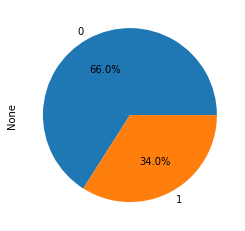

In [ ]:
data = pd.Series([nr_nodrop, nr_drop])
data.plot.pie(autopct="%.1f%%");

Le due classi (i.e. target del classificatore) appaiono leggermente sbilanciate: in dettaglio, la classe dei soggetti che manifestano dropout ha una cardinalità inferiore della classe in cui non si è avuto dropout.

## Random under-sampling
Tecnica consistente nell'eliminazione in maniera randomica di istanze della classe sovra-rappresentata fintanto che la sua cardinalità coincida con quella della classe sotto-rappresentata.

In [ ]:
class_nodrop = train_dataset[train_dataset['DROPOUT'] == False]
class_drop = train_dataset[train_dataset['DROPOUT'] == True]

# Sotto campionamento di class_drop in modo che abbia stessa cardinalità di class_nodrop
class_nodrop = class_nodrop.sample(len(class_drop))

print(f'Classe No-drop: {len(class_nodrop):,}')
print(f'Classe Drop: {len(class_drop):,}')

Classe No-drop: 74,872
Classe Drop: 74,872


In [ ]:
train_dataset = class_drop.append(class_nodrop)

In [ ]:
train_dataset.shape

(149744, 88)

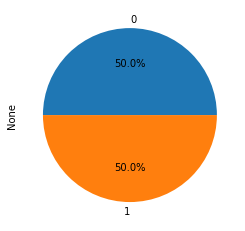

In [ ]:
nr_nodrop, nr_drop = np.bincount(train_dataset['DROPOUT'])
data = pd.Series([nr_nodrop, nr_drop])
data.plot.pie(autopct="%.1f%%");

## Cluster-based over-sampling
Abbiamo scelto di tentare la variante "cluster-based" della tecnica dell'over-sampling come alternativa al random under-sampling, in quanto permette di evitare la riduzione di cardinalità del training set che inevitabilmente segue al random under-sampling.

Inoltre, nel caso del cluster based over-sampling, l'incremento della cardinalità non è guidato da pura casualità (come avviene nel random over-sampling), bensì prevede l'individuazione di cluster all'interno di ogni classe, in modo da poter procedere ad una duplicazione di istanze che sia più uniforme e meno incline all'over-fitting.


https://cluster-over-sampling.readthedocs.io/en/latest/auto_examples/plot_cluster_oversampler.html

https://aiandfriends.blog/site/project/clustering-based-oversampling/

In [ ]:
# Imports
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler
from imblearn.over_sampling import SMOTENC

# Create KMeans-Random instance
categorical_features_indexes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
smotenc = SMOTENC(categorical_features_indexes, random_state=19)
kmeans = KMeans(n_clusters=4, random_state=39)
kmeans_random = ClusterOverSampler(oversampler=smotenc, clusterer=kmeans)

# Fit and resample imbalanced dataa
X = train_dataset.loc[:, train_dataset.columns != 'DROPOUT'].to_numpy()
y = train_dataset['DROPOUT'].to_numpy()
X_res, y_res = kmeans_random.fit_resample(X, y)

In [ ]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print(f'Original dataset shape {X.shape}')
print(X[:,18])
print(X[:,19])

# Original dataset shape (1000, 20)
print(f'Original dataset samples per class {Counter(y)}')

# Original dataset samples per class Counter({1: 900, 0: 100})
# simulate the 2 last columns to be categorical features
X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))
print(f'Resampled dataset samples per class {Counter(y_res)}')
# Resampled dataset samples per class Counter({0: 900, 1: 900})

Original dataset shape (1000, 20)
[ 1.48769854e-01 -2.49699050e-01 -2.87336091e-01  1.21528411e+00
 -1.44594869e+00 -7.84034613e-01  6.01193585e-01  1.48651091e+00
  2.69630677e-01 -2.09434725e+00  3.23217492e+00  8.50439505e-01
 -4.42024720e-01 -1.10933457e-01  1.45215030e+00 -1.04894273e+00
  1.35376510e+00 -3.20169238e-01 -6.78499006e-01  1.70040749e-01
 -1.25304711e+00  3.36993087e-01 -1.03316674e+00  1.22236692e-01
  2.28201500e+00  2.41654946e+00  4.62383759e-01  1.08479068e+00
 -3.56300394e-01  1.13773339e+00  1.21491802e+00  7.64296682e-01
  1.42595269e+00 -8.05866982e-01  7.80164754e-01  8.61637520e-01
  3.40720582e-01  1.82421244e-01  4.12995874e-01  1.08438449e+00
 -8.47726118e-01  7.99643304e-02  3.42817650e-02  2.32095867e-01
 -1.46933177e+00 -1.84344823e-01 -5.73356758e-01 -4.37238019e-02
 -2.14308221e-01  6.36390573e-01 -6.57028125e-01  1.06650303e-01
 -1.16300162e+00 -7.98545549e-01  1.42265847e-01 -2.39240676e-01
 -8.04331682e-01  2.33441278e-02  1.56034537e-01 -8.4098

In [ ]:
type(Xe)

numpy.ndarray

# ESEGUI QUEST'ULTIMA CELLA PER SMONTARE GDRIVE

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')